In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
%pwd

'd:\\SICSR\\project\\MediFlow-Predict\\notebooks'

In [10]:
os.chdir("../")

In [11]:
%pwd

'd:\\SICSR\\project\\MediFlow-Predict'

In [12]:
df = pd.read_csv('data/processed/NoShow.csv')

In [13]:
df.head()

,patient_id,appointment_id,gender,age,neighbourhood,scheduled_day,appointment_day,lead_time_days,appointment_mode,reminder_sent,sms_received,scholarship,hypertension,diabetes,alcoholism,handicap,reported_issue,no_show
0,95985133231274,5626772,F,76,REPÚBLICA,2016-04-27,2016-04-29,1,physical,0,0,0,1,0,0,0,Flu,0
1,733688164476661,5630279,F,23,GOIABEIRAS,2016-04-27,2016-04-29,1,video,0,0,0,0,0,0,0,Cold,1
2,3449833394123,5630575,F,39,GOIABEIRAS,2016-04-27,2016-04-29,1,audio,1,0,0,0,0,0,0,Injury,1
3,78124564369297,5629123,F,19,CONQUISTA,2016-04-27,2016-04-29,1,video,1,0,0,0,0,0,0,Diabetes,0
4,734536231958495,5630213,F,30,NOVA PALESTINA,2016-04-27,2016-04-29,1,video,1,0,0,0,0,0,0,Checkup,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71959 entries, 0 to 71958
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patient_id        71959 non-null  int64 
 1   appointment_id    71959 non-null  int64 
 2   gender            71959 non-null  object
 3   age               71959 non-null  int64 
 4   neighbourhood     71959 non-null  object
 5   scheduled_day     71959 non-null  object
 6   appointment_day   71959 non-null  object
 7   lead_time_days    71959 non-null  int64 
 8   appointment_mode  71959 non-null  object
 9   reminder_sent     71959 non-null  int64 
 10  sms_received      71959 non-null  int64 
 11  scholarship       71959 non-null  int64 
 12  hypertension      71959 non-null  int64 
 13  diabetes          71959 non-null  int64 
 14  alcoholism        71959 non-null  int64 
 15  handicap          71959 non-null  int64 
 16  reported_issue    71959 non-null  object
 17  no_show     

In [16]:
df.notnull().sum()

patient_id          71959
appointment_id      71959
gender              71959
age                 71959
neighbourhood       71959
scheduled_day       71959
appointment_day     71959
lead_time_days      71959
appointment_mode    71959
reminder_sent       71959
sms_received        71959
scholarship         71959
hypertension        71959
diabetes            71959
alcoholism          71959
handicap            71959
reported_issue      71959
no_show             71959
dtype: int64

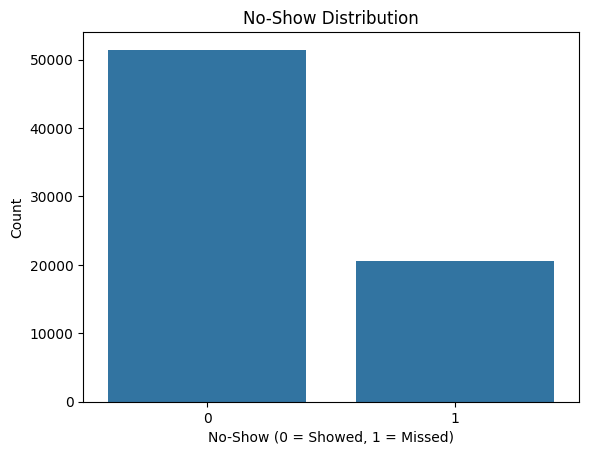

<Figure size 640x480 with 0 Axes>

In [42]:
sns.countplot(x='no_show', data=df)
plt.title('No-Show Distribution')
plt.xlabel('No-Show (0 = Showed, 1 = Missed)')
plt.ylabel('Count')
plt.show()

plt.savefig("reports/visuals/No-Show Distribution.png")

In [22]:
no_show_rate = df['no_show'].mean()
print(f"No-show rate: {no_show_rate:.2%}")

No-show rate: 28.52%


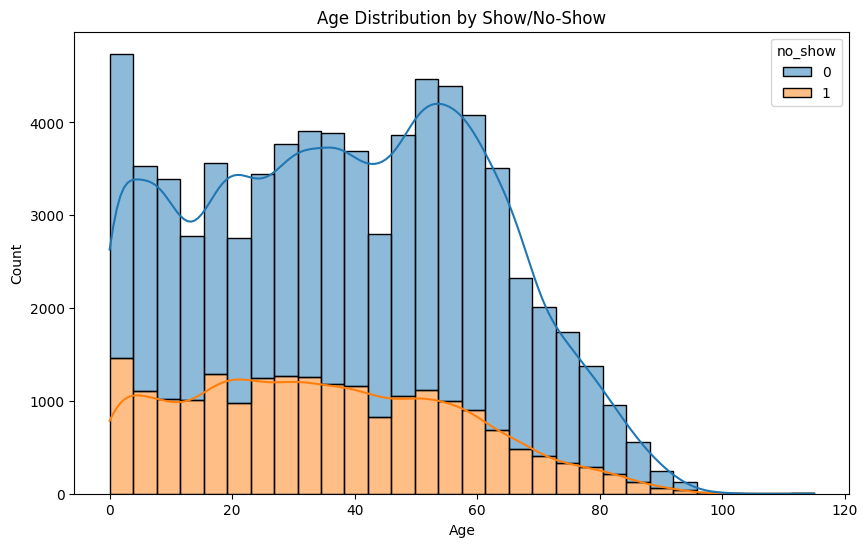

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='no_show', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Show/No-Show')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.savefig("reports/visuals/Age Distribution by Show No-Show.png")


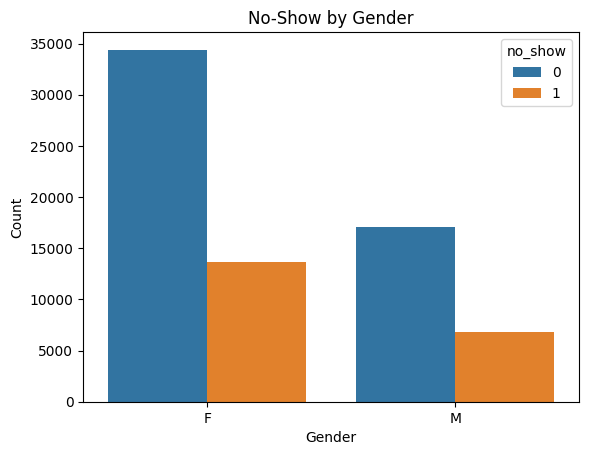

In [24]:
sns.countplot(x='gender', hue='no_show', data=df)
plt.title('No-Show by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [38]:
plt.savefig("reports/visuals/No-Show by gender.png")

<Figure size 640x480 with 0 Axes>

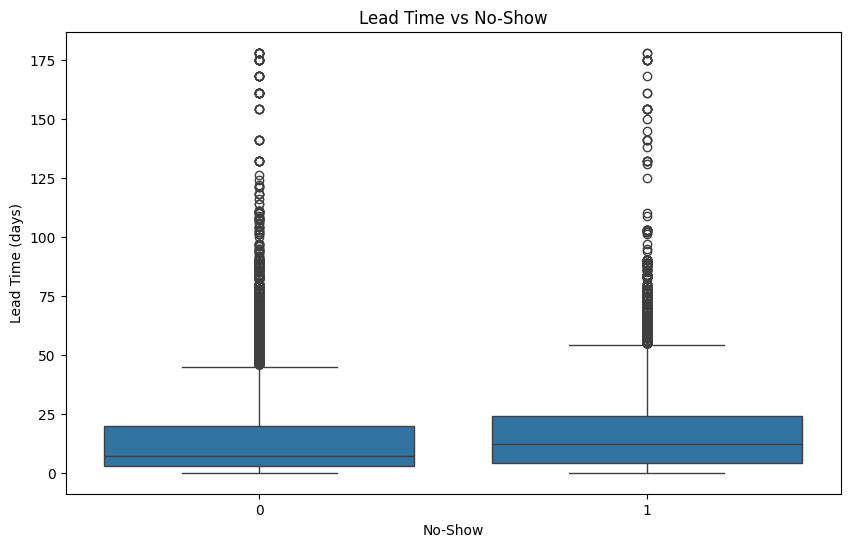

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='no_show', y='lead_time_days', data=df)
plt.title('Lead Time vs No-Show')
plt.xlabel('No-Show')
plt.ylabel('Lead Time (days)')
plt.show()


In [37]:
plt.savefig("reports/visuals/Lead Time vs No-Show.png")

<Figure size 640x480 with 0 Axes>

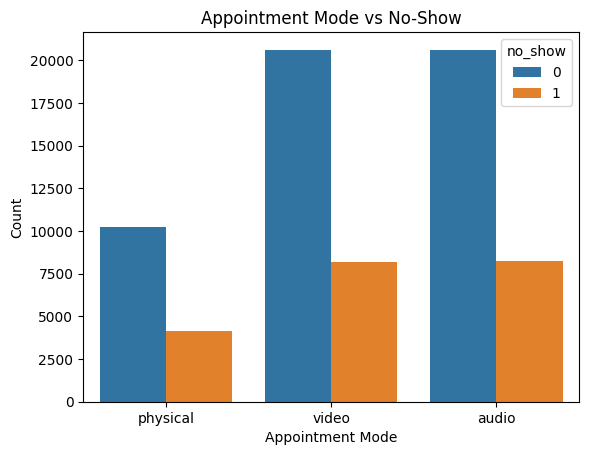

In [26]:
sns.countplot(x='appointment_mode', hue='no_show', data=df)
plt.title('Appointment Mode vs No-Show')
plt.xlabel('Appointment Mode')
plt.ylabel('Count')
plt.show()


In [36]:
plt.savefig("reports/visuals/Appointment Mode vs No-Show.png")

<Figure size 640x480 with 0 Axes>

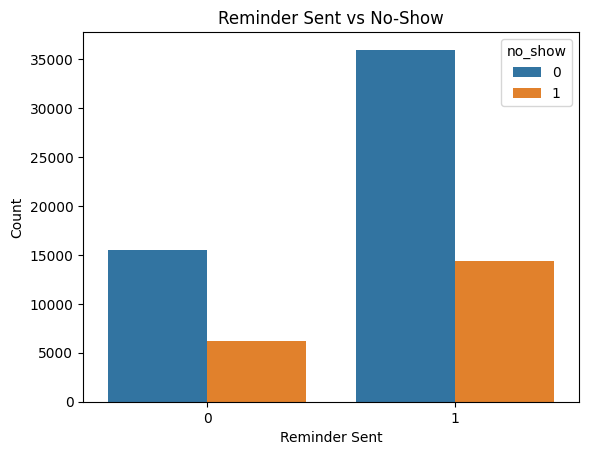

In [ ]:
sns.countplot(x='reminder_sent', hue='no_show', data=df)
plt.title('Reminder Sent vs No-Show')
plt.xlabel('Reminder Sent')
plt.ylabel('Count')
plt.show()


In [35]:
plt.savefig("reports/visuals/Reminder Sent vs No-Show.png")

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [30]:
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()


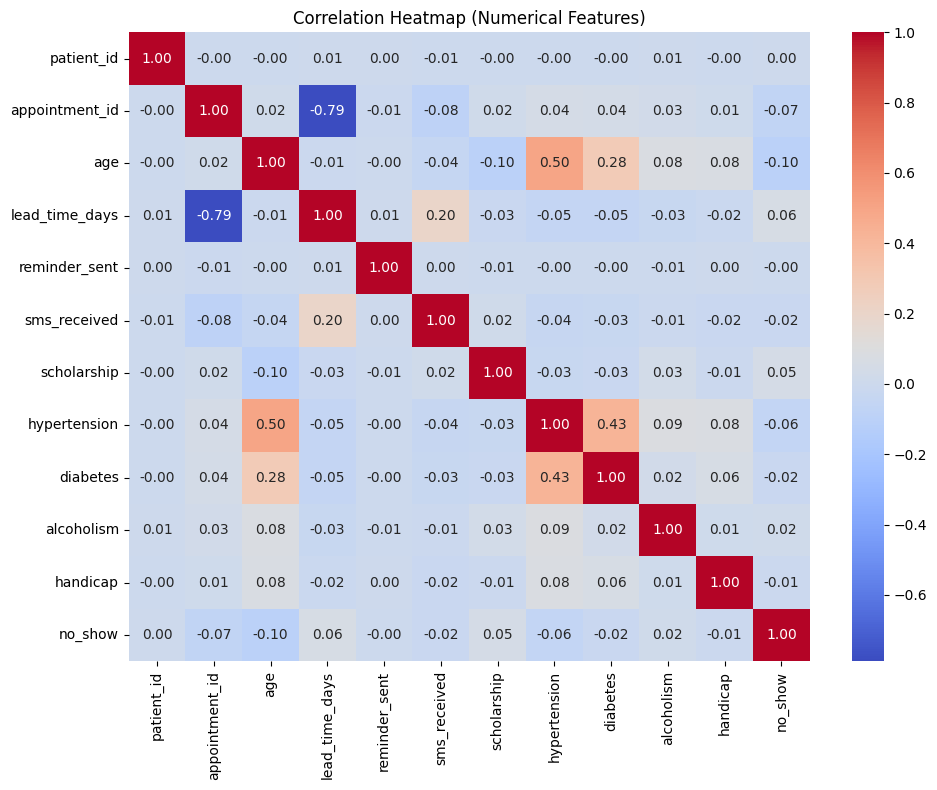

In [31]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.savefig("reports/visuals/correlation_heatmap.png")
plt.show()

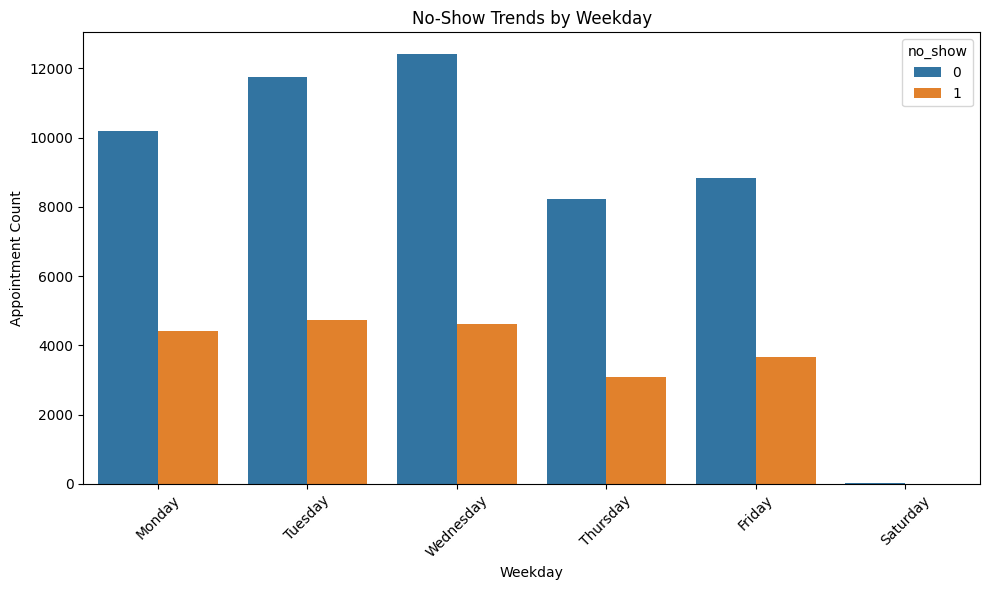

In [32]:
# Convert to datetime if not already
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

# Extract weekday
df['weekday'] = df['appointment_day'].dt.day_name()

# Plot no-show counts by weekday
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', hue='no_show', data=df,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('No-Show Trends by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Appointment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("reports/visuals/weekday_no_show_trend.png")
plt.show()
